In [68]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns 


In [69]:
customers=pd.read_csv('Wholesale+Customers+Data.csv',index_col='Buyer/Spender')
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,,,,,,,,
1,Retail,Other,12669,9656,7561,214,2674,1338
2,Retail,Other,7057,9810,9568,1762,3293,1776
3,Retail,Other,6353,8808,7684,2405,3516,7844
4,Hotel,Other,13265,1196,4221,6404,507,1788
5,Retail,Other,22615,5410,7198,3915,1777,5185


In [70]:
customers.shape

(440, 8)

# 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [71]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 1 to 440
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 30.9+ KB


There are total of 440 entries in the dataset with 8 columns including the index. 'Channel' & 'Region' is of object (text) type. Rest of the 6 columns are of integer type.Dataset has no missing values in it.

In [72]:
customers.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<AxesSubplot:xlabel='Channel', ylabel='in millions'>

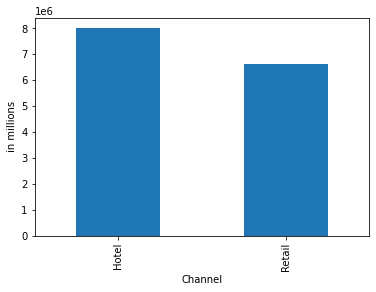

In [73]:
customers['Total_sum']=customers['Fresh']+customers['Milk']+customers['Grocery']+customers['Frozen']+customers['Detergents_Paper']+customers['Delicatessen']
customers.groupby('Channel').sum()['Total_sum'].plot(kind='bar',ylabel='in millions')


Within the Channel Hotel has spent the most amount and Retail has spent the least

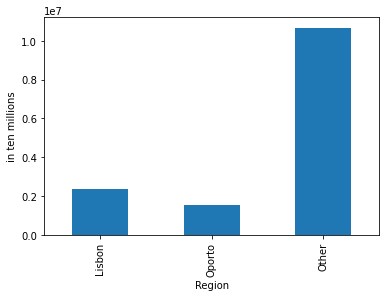

In [74]:
customers.groupby('Region').sum()['Total_sum'].plot(kind='bar',ylabel='in ten millions')
customers.drop(columns='Total_sum',inplace=True)

Within the Region , Oporto has spent the least of all and Other category has spent the most.

# 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer. 

In [75]:
customers[(customers.Region=='Lisbon') & (customers.Channel== 'Hotel')].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,12902.254237,3870.203390,4026.135593,3127.322034,950.525424,1197.152542
std,12342.008901,4298.321195,3629.644143,3276.460124,1305.907616,1219.945304
min,514.000000,258.000000,489.000000,91.000000,5.000000,7.000000
25%,4437.500000,1071.000000,1620.000000,966.000000,237.000000,374.000000
50%,8656.000000,2280.000000,2576.000000,1859.000000,412.000000,749.000000
75%,18135.000000,4995.500000,5172.500000,4479.000000,874.000000,1621.500000
max,56083.000000,23527.000000,16966.000000,18711.000000,5828.000000,6854.000000


In [76]:
df=customers[(customers.Region=='Lisbon') & (customers.Channel== 'Hotel')]
df.std()/df.mean()

Fresh               0.956578
Milk                1.110619
Grocery             0.901521
Frozen              1.047689
Detergents_Paper    1.373880
Delicatessen        1.019039
dtype: float64

Text(0.5, 1.0, 'Lisbon Hotel')

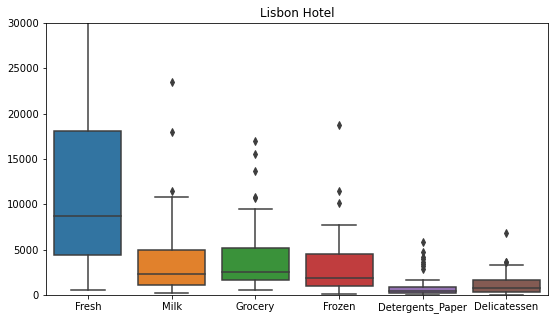

In [77]:
plt.figure(figsize=(9,5))
sns.boxplot(data=customers[(customers.Region=='Lisbon') & (customers.Channel== 'Hotel')])
plt.ylim(0,30000)
plt.title('Lisbon Hotel')

In [78]:
customers[(customers.Region=='Lisbon') & (customers.Channel== 'Retail')].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,5200.000000,10784.000000,18471.944444,2584.111111,8225.277778,1871.944444
std,5415.521495,6609.221463,10414.687844,2424.774577,5515.878798,1626.486667
min,18.000000,2527.000000,5265.000000,61.000000,788.000000,120.000000
25%,2378.250000,6253.250000,10634.250000,923.500000,4818.250000,746.000000
50%,2926.000000,8866.000000,16106.000000,1522.000000,6177.000000,1414.000000
75%,5988.000000,13112.250000,23478.750000,3843.000000,11804.750000,2456.500000
max,20782.000000,28326.000000,39694.000000,8321.000000,19410.000000,6372.000000


Text(0.5, 1.0, 'Lisbon Retail')

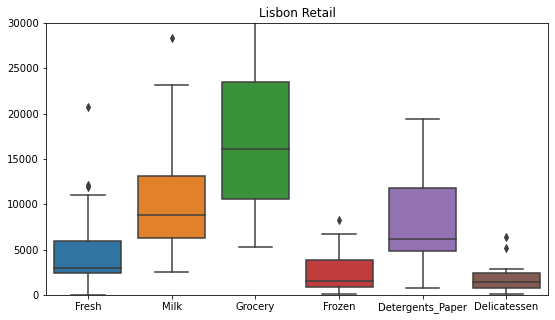

In [79]:
plt.figure(figsize=(9,5))
sns.boxplot(data=customers[(customers.Region=='Lisbon') & (customers.Channel== 'Retail')])
plt.ylim(0,30000)
plt.title('Lisbon Retail')

In [80]:
 customers[(customers.Region=='Oporto') & (customers.Channel=='Hotel')].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,11650.535714,2304.250000,4395.500000,5745.035714,482.714286,1105.892857
std,8969.362752,2968.628697,3048.298815,11454.478518,425.310506,1056.778800
min,3.000000,333.000000,1330.000000,264.000000,15.000000,51.000000
25%,4938.250000,1146.000000,2373.750000,962.250000,182.750000,567.250000
50%,9787.000000,1560.500000,3352.000000,2696.500000,325.000000,883.000000
75%,17031.500000,2344.750000,5527.500000,4617.000000,707.000000,1146.000000
max,32717.000000,16784.000000,13626.000000,60869.000000,1679.000000,5609.000000


Text(0.5, 1.0, 'Oporto Hotel')

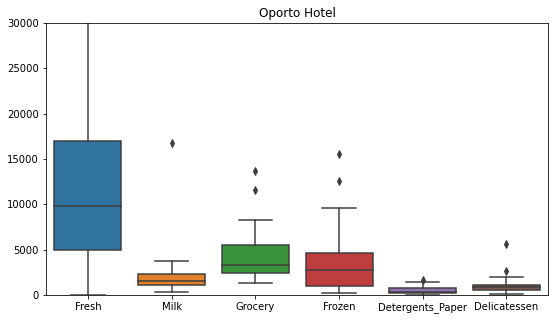

In [81]:
plt.figure(figsize=(9,5))
sns.boxplot(data=customers[(customers.Region=='Oporto') & (customers.Channel== 'Hotel')])
plt.ylim(0,30000)
plt.title('Oporto Hotel')

In [82]:
customers[(customers.Region=='Oporto') & (customers.Channel=='Retail')].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,7289.789474,9190.789474,16326.315789,1540.578947,8410.263158,1239.000000
std,6867.934548,6611.354136,14035.453775,2473.266471,8286.748255,1065.438042
min,161.000000,928.000000,2743.000000,131.000000,332.000000,59.000000
25%,2368.000000,4148.500000,9318.500000,639.500000,3900.000000,392.500000
50%,6468.000000,6817.000000,12469.000000,934.000000,6236.000000,1037.000000
75%,9162.000000,13127.500000,19785.500000,1410.000000,9837.500000,1815.000000
max,27082.000000,25071.000000,67298.000000,11559.000000,38102.000000,3508.000000


Text(0.5, 1.0, 'Oporto Retail')

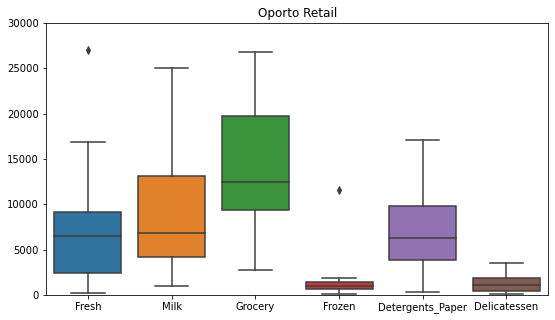

In [83]:
plt.figure(figsize=(9,5))
sns.boxplot(data=customers[(customers.Region=='Oporto') & (customers.Channel== 'Retail')])
plt.ylim(0,30000)
plt.title('Oporto Retail')

In [84]:
customers[(customers.Region=='Other') & (customers.Channel=='Hotel')].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,13878.052133,3486.981043,3886.734597,3656.900474,786.682464,1518.284360
std,14746.572913,4508.505269,3593.506056,4956.590848,1099.970640,3663.183304
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3702.500000,1188.500000,1666.000000,779.000000,176.500000,378.500000
50%,9612.000000,2247.000000,2642.000000,1960.000000,375.000000,823.000000
75%,18821.000000,4205.000000,4927.500000,4542.500000,948.500000,1582.000000
max,112151.000000,43950.000000,21042.000000,36534.000000,6907.000000,47943.000000


Text(0.5, 1.0, 'Other Hotel')

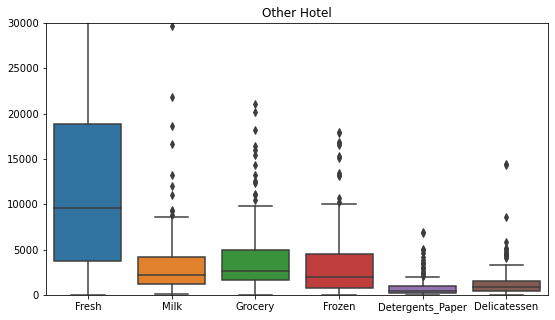

In [85]:
plt.figure(figsize=(9,5))
sns.boxplot(data=customers[(customers.Region=='Other') & (customers.Channel== 'Hotel')])
plt.ylim(0,30000)
plt.title('Other Hotel')

In [86]:
customers[(customers.Region=='Other') & (customers.Channel=='Retail')].describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,9831.504762,10981.009524,15953.809524,1513.200000,6899.238095,1826.209524
std,9635.394129,10574.827178,12298.935356,1504.498737,6022.091110,2119.052222
min,23.000000,1124.000000,4523.000000,33.000000,523.000000,3.000000
25%,2343.000000,6128.000000,9170.000000,437.000000,3537.000000,545.000000
50%,7362.000000,7845.000000,12121.000000,1059.000000,5121.000000,1386.000000
75%,15076.000000,11114.000000,19805.000000,2194.000000,7677.000000,2158.000000
max,44466.000000,73498.000000,92780.000000,8132.000000,40827.000000,16523.000000


Text(0.5, 1.0, 'Other Retail')

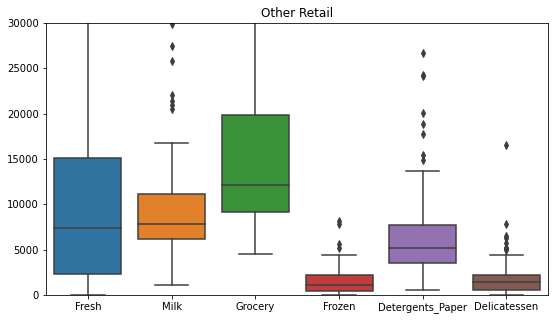

In [87]:
plt.figure(figsize=(9,5))
sns.boxplot(data=customers[(customers.Region=='Other') & (customers.Channel== 'Retail')])
plt.ylim(0,30000)
plt.title('Other Retail')

(0.0, 35000.0)

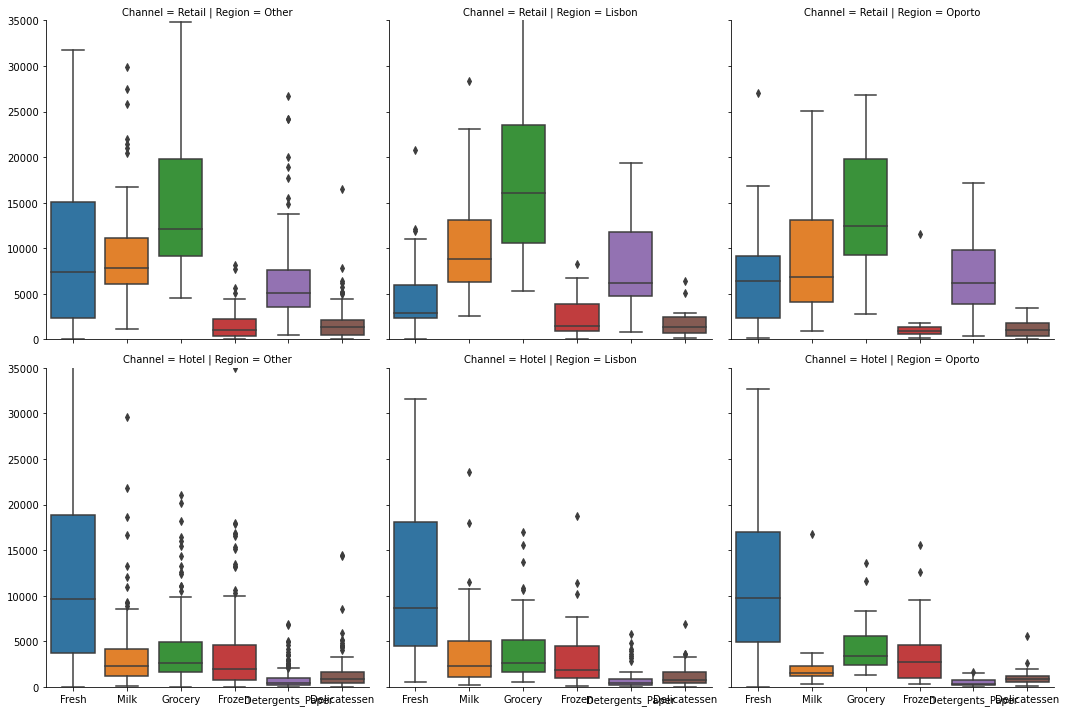

In [88]:
df=customers.groupby(['Region','Channel'],as_index=False).mean()
sns.catplot(data=customers,col='Region',kind='box',row='Channel')
plt.ylim(0,35000)

# 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [89]:
customers.std()/customers.mean() *100

Fresh               105.391792
Milk                127.329858
Grocery             119.517437
Frozen              158.033238
Detergents_Paper    165.464714
Delicatessen        184.940690
dtype: float64

The item that shows most inconsistent is 'Delicatessen' and the least inconsistent is 'Fresh'

# 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

<AxesSubplot:>

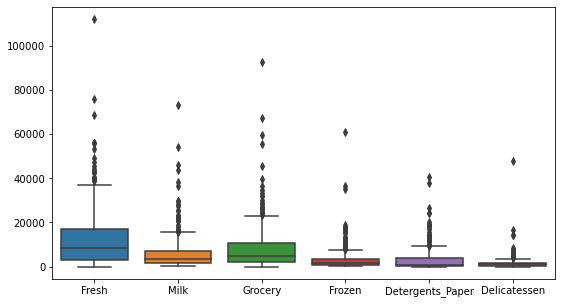

In [90]:
plt.figure(figsize=(9,5))
sns.boxplot(data=customers)


There are outliers are present in the data , in the plot the dots beyond the maximum line are outliers . 

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

<AxesSubplot:xlabel='Channel'>

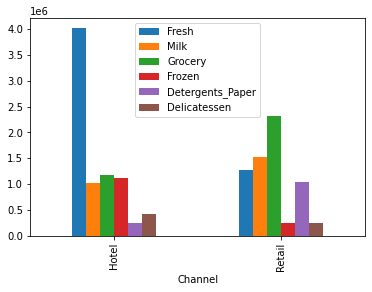

In [91]:
customers.groupby('Channel').sum().plot(kind='bar')

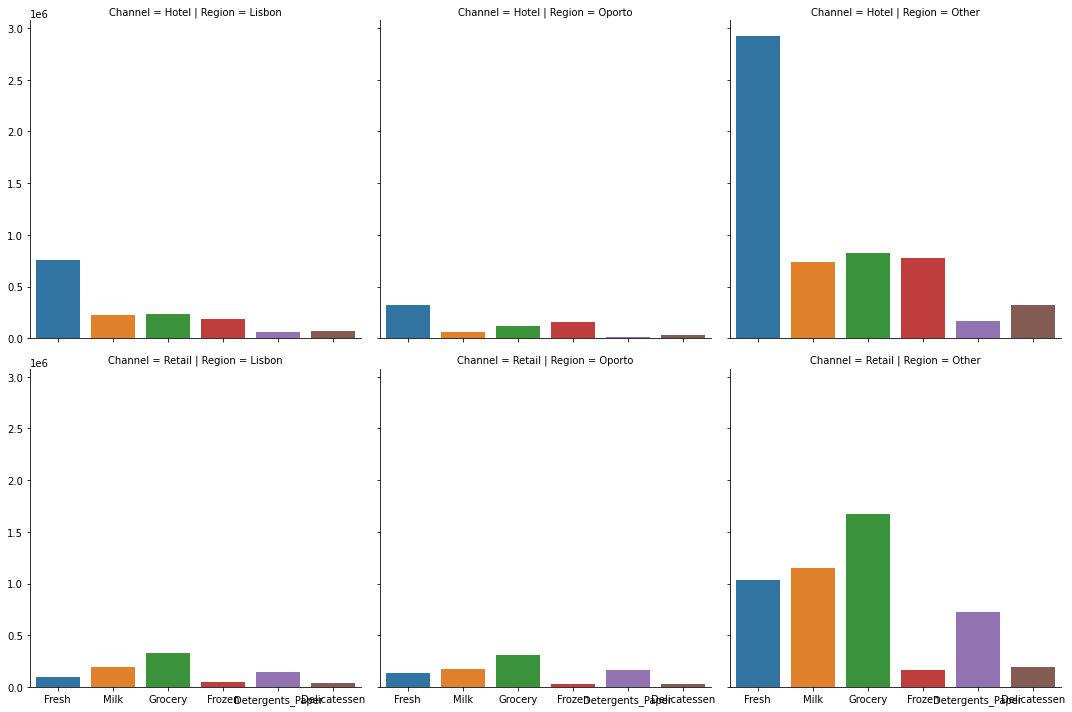

In [92]:
df=customers.groupby(['Region','Channel'],as_index=False).sum()
sns.catplot(data=df,col='Region',kind='bar',row='Channel')

From the analysis we can see that Retail shows less expenditure than Hotel so we can concentrate in bringing more retailers who works in retail channel.Of all the region, Oporto is the least of all that is because very less retailer are doing business in that region so we can canvas or advertise and reach out more retailers in that region.


In Hotels of Oporto sale of milk and Grocery is less compared to Lisbon and other areas so we can try to get more retailers who sell more of milk and grocery

In the retail side the sale of Frozen food is less we can check for the reason and improve the stocks management or marketing techniques.

In retails of Oporto and Lisbon the sale of Fresh is less we can ask retailers to invest in fresh foods more.

The sale of Delicatessen is very unstable we can try to stabilise the sell by attracting more customers.


# The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [93]:
students=pd.read_csv('Survey-1.csv')
students.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [94]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable) 2.1.1. Gender and Major 

In [95]:
pd.crosstab(index=students.Gender,columns=students.Major)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


It seems like female students prefer CIS ,Economics/Finance ,International Business and Retailing/Marketing
and male students go for Accounting,Management.

There are no female students who havent decided their major where as there are few male students who havent decided yet.

# 2.1.2. Gender and Grad Intention 

In [96]:
students.columns=students.columns.str.replace(' ','_')
pd.crosstab(index=students.Gender,columns=students.Grad_Intention)

Grad_Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


Most of them have said yes , compared to female students very less male students havent decided or said no

# 2.1.3. Gender and Employmentf 

In [97]:
pd.crosstab(index=students.Gender,columns=students.Employment)

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


Most of the students are Part time working in general. Majority of men are full time working compared to women and majority of the women are unemployed compared to men

# 2.1.4. Gender and Computer 

In [98]:
pd.crosstab(students.Gender,students.Computer)

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


Most of the students are using laptops very few students are using tablet and desktop

# 2.2.1. What is the probability that a randomly selected CMSU student will be male? 

In [99]:
students.Gender.value_counts()['Male'] / students.Gender.size

0.46774193548387094

# 2.2.2. What is the probability that a randomly selected CMSU student will be female? 

In [100]:
students.Gender.value_counts()['Female'] / students.Gender.size

0.532258064516129

# 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [101]:
pd.crosstab(students.Major,students.Gender)

Gender,Female,Male
Major,,
Accounting,3,4
CIS,3,1
Economics/Finance,7,4
International Business,4,2
Management,4,6
Other,3,4
Retailing/Marketing,9,5
Undecided,0,3


In [102]:
pd.crosstab(students.Major,students.Gender)['Male'] /29

Major
Accounting                0.137931
CIS                       0.034483
Economics/Finance         0.137931
International Business    0.068966
Management                0.206897
Other                     0.137931
Retailing/Marketing       0.172414
Undecided                 0.103448
Name: Male, dtype: float64

# 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [103]:
pd.crosstab(students.Major,students.Gender)['Female'] / 33

Major
Accounting                0.090909
CIS                       0.090909
Economics/Finance         0.212121
International Business    0.121212
Management                0.121212
Other                     0.090909
Retailing/Marketing       0.272727
Undecided                 0.000000
Name: Female, dtype: float64

# 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [104]:
pd.crosstab(students.Gender,students.Grad_Intention)

Grad_Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [105]:
pd.crosstab(students.Gender,students.Grad_Intention)['Yes']['Male'] / students.shape[0]

0.27419354838709675

# 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [106]:
pd.crosstab(students.Gender,students.Computer)

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [107]:
4/62 

0.06451612903225806

# 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [108]:
students.Gender.value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

Prob of male= 29/62

In [109]:
students.Employment.value_counts()

Part-Time     43
Full-Time     10
Unemployed     9
Name: Employment, dtype: int64

Prob of full time=10/62

In [110]:
pd.crosstab(students.Gender,students.Employment)

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


Prob of male and full time=7/62

In [111]:
print('Probability=',(29+10-7)/62)

Probability= 0.5161290322580645


# 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management. 

Total number of female= 33


In [112]:
pd.crosstab(students.Gender,students.Major)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [113]:
print('Probability=',8/33)

Probability= 0.24242424242424243


# 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [114]:
temp=pd.crosstab(students.Gender,students.Grad_Intention).drop(columns='Undecided')
temp

Grad_Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


To check for dependancy we can do chisquare.

Ho: two variables are independant

Ha:two variables are dependant

In [115]:
chi2,pval,dof,exp=sc.stats.chi2_contingency(temp,correction=False)
print(chi2,pval)

4.285714285714286 0.03843393023678176


We can see that pval is less than 0.05 so we can reject null hypothesis and accept the alternative hypothesis.
By accepting the Ha , we can say that Gender and Grad_Intention are dependant on each other

# 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

# 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [46]:
pd.crosstab(students.Gender,students.GPA)

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9
Gender,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0


students less than 3 gpa=8+9

In [47]:
print('P(students < 3 Gpa)= ',(9+8)/62)

P(students < 3 Gpa)=  0.27419354838709675


# 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [48]:
pd.crosstab(students.Gender,students.Salary)

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


In [49]:
print('P(Earns >= 50 |Male) =' ,(4+1+1+3+3+1+1)/29)

P(Earns >= 50 |Male) = 0.4827586206896552


In [50]:
print('P(Earns >= 50 |Female) =' ,(5+5+5+1+1+1)/33)

P(Earns >= 50 |Female) = 0.5454545454545454


# 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions for this whole Problem 2. 

E:\ProgramFiles\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


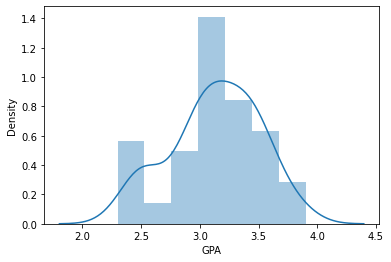

mean :  3.129032258064516
median :  3.1500000000000004
mode :  0    3.0
1    3.1
2    3.4
dtype: float64
mean =  3.129032258064516
Std =  0.3773883926969118
values between 1 std  0.7258064516129032
values between 2 std  0.967741935483871
values between 3 std  1.0


E:\ProgramFiles\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


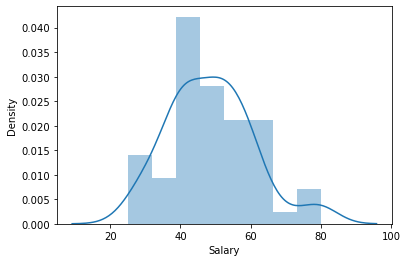

mean :  48.54838709677419
median :  50.0
mode :  0    40.0
dtype: float64
mean =  48.54838709677419
Std =  12.080912216337277
values between 1 std  0.7903225806451613
values between 2 std  0.9516129032258065
values between 3 std  1.0


E:\ProgramFiles\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


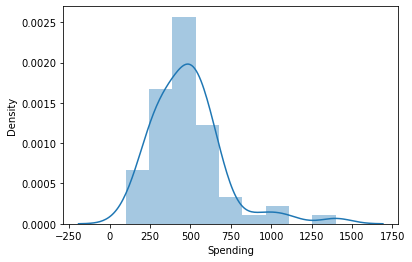

mean :  482.01612903225805
median :  500.0
mode :  0    500
dtype: int64
mean =  482.01612903225805
Std =  221.95380496596204
values between 1 std  0.8064516129032258
values between 2 std  0.9516129032258065
values between 3 std  0.9838709677419355


E:\ProgramFiles\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


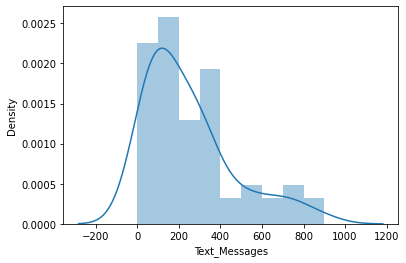

mean :  246.20967741935485
median :  200.0
mode :  0    300
dtype: int64
mean =  246.20967741935485
Std =  214.4659503026961
values between 1 std  0.7903225806451613
values between 2 std  0.9193548387096774
values between 3 std  0.9838709677419355


In [51]:
for x in ['GPA','Salary','Spending','Text_Messages']:
    plt.figure()
    sns.distplot(students[x])
    plt.show()
    print('mean : ',students[x].mean())
    print('median : ',students[x].median())
    print('mode : ',students[x].mode())

    mu=students[x].mean()
    sd=students[x].std()
    print('mean = ', mu)
    print('Std = ',sd)

    print('values between 1 std ',students[(students[x] >= mu-sd) & (students[x] <= mu+sd)]['GPA'].count() / students[x].count())

    print('values between 2 std ',students[(students[x] >= mu-(2*sd)) & (students[x] <= mu+(2*sd))]['GPA'].count() / students[x].count())

    print('values between 3 std ',students[(students[x] >= mu-(3*sd)) & (students[x] <= mu+(3*sd))]['GPA'].count() / students[x].count())

In [60]:
#Ho: the variable is normal
#Ha: the variable is not normal

for i in ['GPA','Salary','Spending','Text_Messages']:
    static,pval=sc.stats.shapiro(students[i])
    print(pval)
    if(pval <0.05):
        #We reject the null hypothesis and accept the Ha
        print(i,' variable is not normal')
    else:
        print(i,' variable is normal')
        

0.11204058676958084
GPA  variable is normal
0.028000956401228905
Salary  variable is not normal
1.6854661225806922e-05
Spending  variable is not normal
4.324040673964191e-06
Text_Messages  variable is not normal


# Problem 3 

## An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

In [62]:
shingles=pd.read_csv('A+&+B+shingles.csv')
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [67]:
shingles.shape

(36, 2)

In [69]:
shingles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


# 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

Shingles A:


To check the permissibility of the shingles we are going to run a T-test to test on the following hypothesis

STEP 1: Framing the Ho and Ha

Ho: the mean of shingles <= 0.35

Ha: the mean of shingles >0.35

STEP 2: 
Deciding the alpha value 0.05

STEP 3: Deciding the test statistic

In this case the test statistic is one sample T-test

STEP 4:
Computing the test_statistic and p_value

In [87]:
test_statistic,p_val=sc.stats.ttest_1samp(shingles.A,0.35)
p_val=p_val/2
print('Test_statisc={} and p_value={}'.format(test_statistic,p_val))

Test_statisc=-1.4735046253382782 and p_value=0.07477633144907513


STEP 5:
Rejecting or accepting the null hypothesis based on the condition p_val< 0.05

Since p_value is not less than 0.05 (alpha) we fail to reject the null hypothesis, which means the mean of the shilings tested has the mean <=0.35.

## At 95% confidence interval we have the evidence to say that the mean of shingles A is less than or equal to 0.35. So the company's claim stays true for this case

Shingles B:

We can run similar hypothesis test with the Ho and Ha.

Ho: mean of shingles <=0.35

Ha: mean of shingles >0.35

In [100]:
test_statistic,p_val=sc.stats.ttest_1samp(shingles.B,0.35,nan_policy='omit')
p_val=p_val/2
print('Test_statisc={} and p_value={}'.format(test_statistic,p_val))

Test_statisc=-3.1003313069986995 and p_value=0.0020904774003191826


As we can see the p_value is less than 0.05(alpha) we have enough evidence to reject the null hypothesis. 

## At 95% confidence interval we have the evidence to say that the mean of Shingles B is greater than 0.35 .The company's claim stays false for this case.

# 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?
 

#####  Assumptions to be made are:

###### > The samples are continous 

###### > The sample is derived from a population in  a random manner.

###### > Data plotted follows a normal distribution

###### > Equal variance between the two samples 

In [90]:
shingles.A.std()

0.13573082605973166

In [96]:
shingles.B.std()

0.13729647694185443

The above are the assumptions are to be made to test for t-sample amoung two samples.To check whether the population mean are equal we can run the paired sample t-test.

STEP 1: Hypothesis framing

Ho: mean of A= mean of B

Ha: mean of A != mean of B


STEP 2: choosing level of significance 0.05

STEP 3: choosing the test statistic(paired sample t-test)

STEP 4:calculating test statistic and p value

In [103]:
test_statistic,p_val=sc.stats.ttest_ind(shingles.A,shingles.B,nan_policy='omit',equal_var=True)
print('Test_statisc={} and p_value={}'.format(test_statistic,p_val))

Test_statisc=1.2896282719661123 and p_value=0.2017496571835306


P_value is greater than 0.05 so we donot have enough evidence to reject null hypothesis.

#### At 95% confidence interval we have enough evidence to say that the population mean of Shingles A and Shingles B are equal.